Alex Bombrun 24/03/2018

A notebook to generate random lensed QSOs to illustrate proper motion magnification. With Gaia DR2 one might expect to have for the first time some proper motion in strong lensed QSOs.

If $dy$ is the proper motion of a source at $y$ one get the proper motion magnification in each image as $dx = A^{-1} dy$, where $A$ is the distortion matrix a the location of the image $x$.

This notebook is based on the SIE lens model. There are many other different lens models. Similar consideration might be applied to any lens models that defined image location and distortion matrix.

# SIS : limit of SIE model  

The SIE model was introduced in Kormann, Schneider & Bartelmann (1994) http://adsabs.harvard.edu/abs/1994A%26A...284..285K

### SIS model
$$\kappa =  \frac{1}{2\,x}$$
$$\alpha = \frac{x}{|x|}$$
$$ x = y - \frac{x}{|x|}$$

$$x=(r,\varphi)$$

$$ r \cos{\varphi} \, e_1 + r \sin{\varphi} \, e_2 =  (y_1- \cos{\varphi}) \, e_1 + (y_2- \sin{\varphi}) \, e_2 $$

$$ r = (y_1- \cos{\varphi})\cos{\varphi} + (y_2- \sin{\varphi})\sin{\varphi} $$


$$(y_1 + \cos{\varphi})\sin{\varphi} - (y_2 + \sin{\varphi})\cos{\varphi} = 0$$


In [1]:
from context import lens
import lens.sis.model as sis
import lens.sis.plot as plot

In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.misc import derivative

import pandas as pd
import astropy.units as u

%matplotlib inline

In [3]:
mp.rcParams['figure.figsize']=[12,8]

(-2, 2)

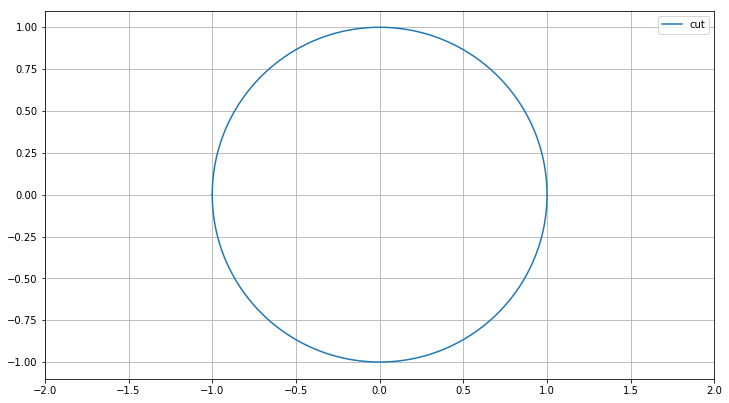

In [5]:
ax = plt.subplot(111,aspect='equal')
plot.plotLens(ax,color='C0')
plt.grid()
plt.legend()
plt.xlim(-2,2)

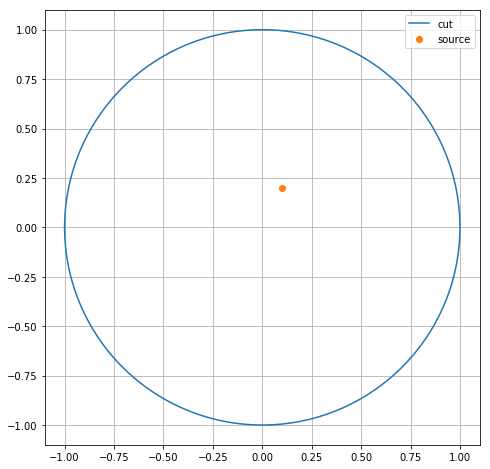

In [6]:
y1=0.1
y2=0.2
eq = lambda phi : sis.eq2(phi,y1,y2)

ax = plt.subplot(111,aspect='equal')
plot.plotLens(ax)
ax.scatter(y1,y2,label="source",color='C1')
plt.grid()
plt.legend()

to visualise the lens equation

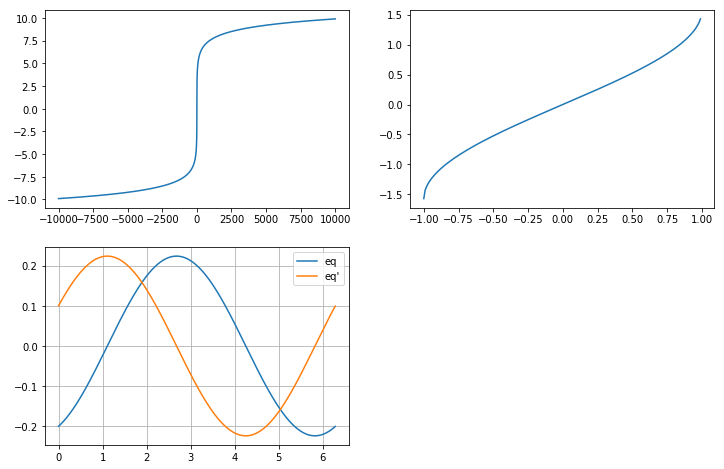

In [9]:
plt.subplot(221)
x =  np.arange(-1e4,1e4,0.1)
plt.plot(x,np.arcsinh(x))
plt.subplot(222)
x =  np.arange(-1,1,0.01)
y = np.arcsin(x)
plt.plot(x,y)

plt.subplot(223)
phi = np.arange(0,2*np.pi,0.01)
plt.plot(phi,eq(phi),label='eq')
plt.plot(phi,derivative(eq, phi, dx=1e-4),label='eq\'')
plt.grid()
plt.legend()

In [10]:
data = y1,y2
phis,xs = sis.solve(*data)
print(phis,xs)

[1.10714872 4.24874137] [1.2236068 0.7763932]


plot lens

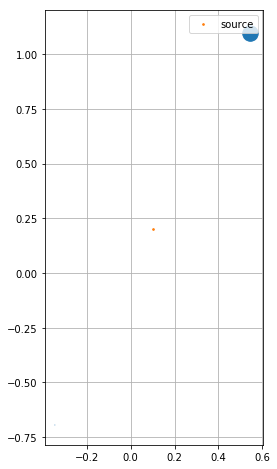

In [11]:
ax = plt.subplot(111,aspect='equal')
ax.scatter(xs*np.cos(phis),xs*np.sin(phis),s = np.exp(sis.magnification(xs,phis)))
ax.scatter(y1,y2,s=np.exp(1),label="source")
plt.grid()
plt.legend()

test magnification

In [12]:
As = sis.A(xs,phis)
magnifications = [1/np.linalg.det(As[:,:,i]) for i in np.arange(0,len(phis))]
magnifications - sis.magnification(xs,phis)

array([ 8.88178420e-16, -1.33226763e-15])

proper motion

In [13]:
dy = np.array([0.01,0.01])

In [14]:
np.dot(np.linalg.inv(As[:,:,0]),dy)

array([0.02788854, 0.00105573])

In [15]:
[np.dot(np.linalg.inv(As[:,:,i]),dy) for i in np.arange(0,len(phis))]

[array([0.02788854, 0.00105573]), array([-0.00788854,  0.01894427])]

In [17]:
dy =  plot.circle()

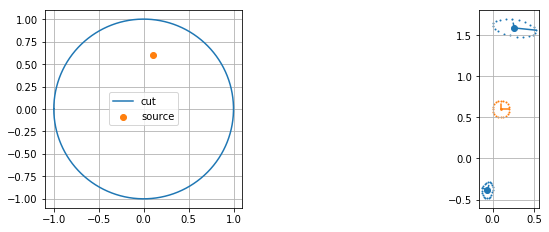

In [19]:
plot.plotLensSourceImage(0.1,0.6)

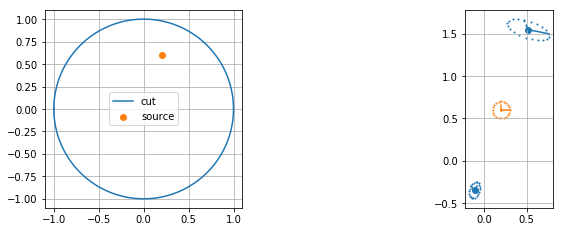

In [20]:
plot.plotLensSourceImage(0.2,0.6)

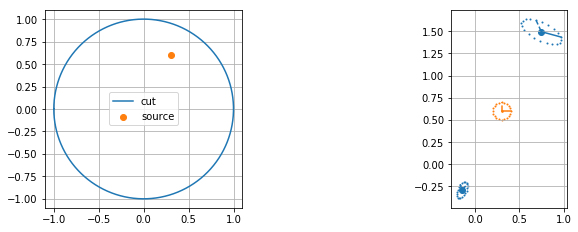

In [21]:
plot.plotLensSourceImage(0.3,0.6)

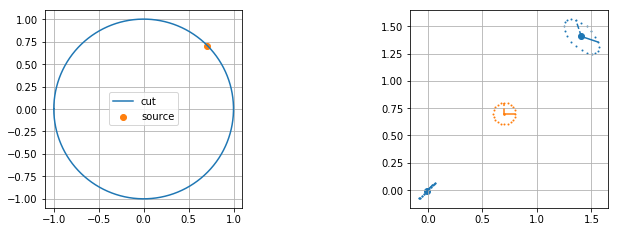

In [22]:
plot.plotLensSourceImage(0.7,0.7)

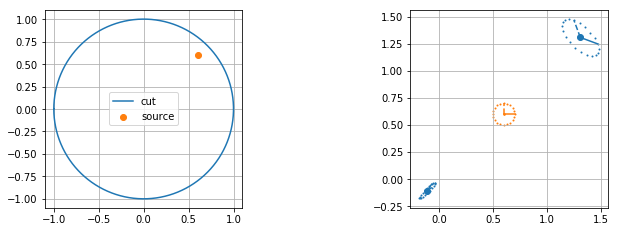

In [23]:
plot.plotLensSourceImage(0.6,0.6)

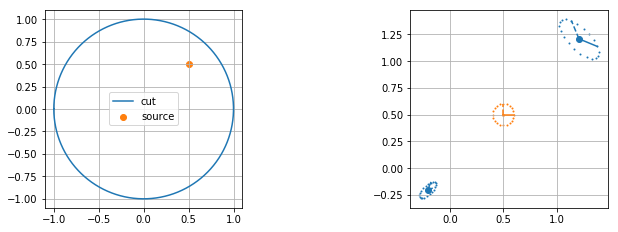

In [24]:
plot.plotLensSourceImage(0.5,0.5)

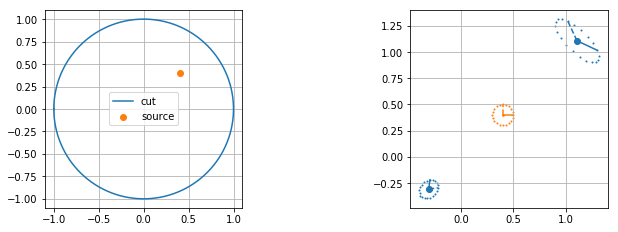

In [25]:
plot.plotLensSourceImage(0.4,0.4)

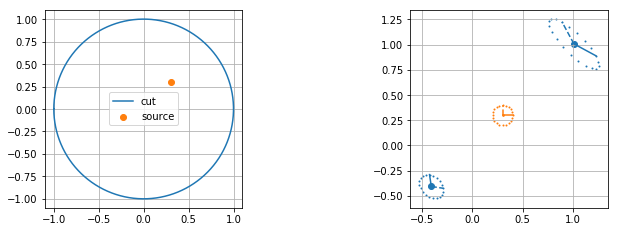

In [26]:
plot.plotLensSourceImage(0.3,0.3)

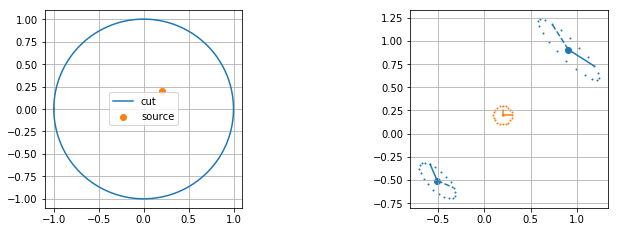

In [27]:
plot.plotLensSourceImage(0.2,0.2)

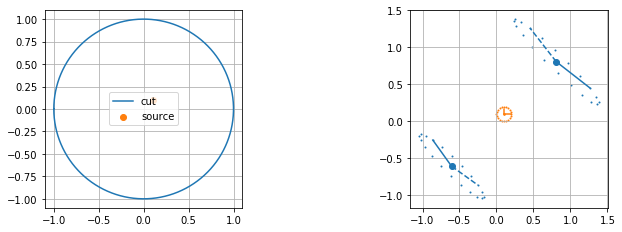

In [28]:
plot.plotLensSourceImage(0.1,0.1)

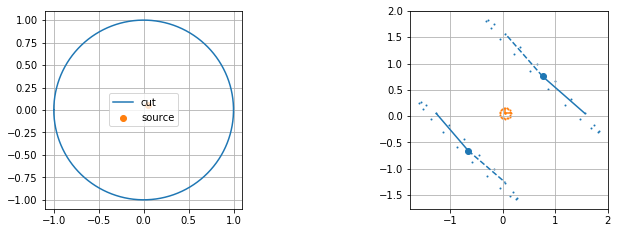

In [29]:
plot.plotLensSourceImage(0.05,0.05)

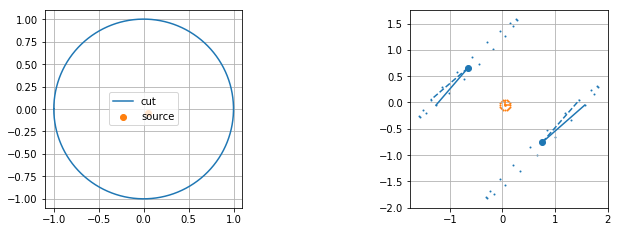

In [30]:
plot.plotLensSourceImage(0.05,-0.05)

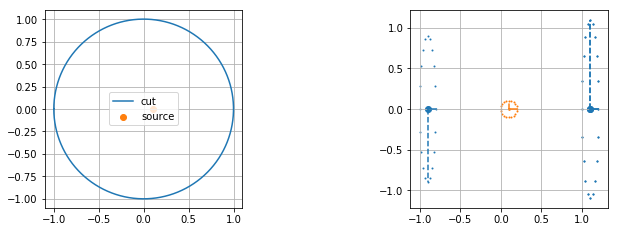

In [31]:
plot.plotLensSourceImage(0.1,0)

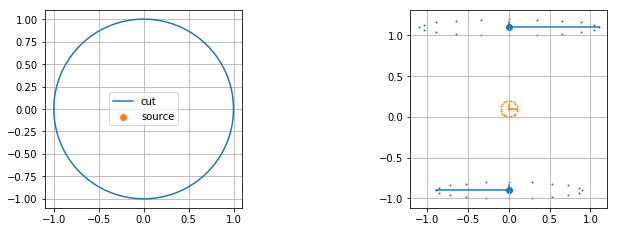

In [32]:
plot.plotLensSourceImage(0,0.1)

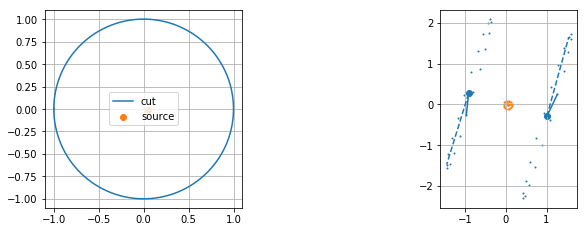

In [33]:
plot.plotLensSourceImage(0.048,-0.014)